## Testing Baseline ML Models witha big loop 

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Dataset shape: (1213, 191)
Target distribution:
ADHD_Outcome
1    831
0    382
Name: count, dtype: int64
Features shape: (1213, 189)
Target shape: (1213,)
Training set: (970, 189)
Test set: (243, 189)

Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.7737
F1-Score (Macro): 0.7253
F1-Score (Weighted): 0.7675

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.56      0.61        77
           1       0.81      0.87      0.84       166

    accuracy                           0.77       243
   macro avg       0.74      0.72      0.73       243
weighted avg       0.77      0.77      0.77       243

Confusion Matrix:
[[ 43  34]
 [ 21 145]]


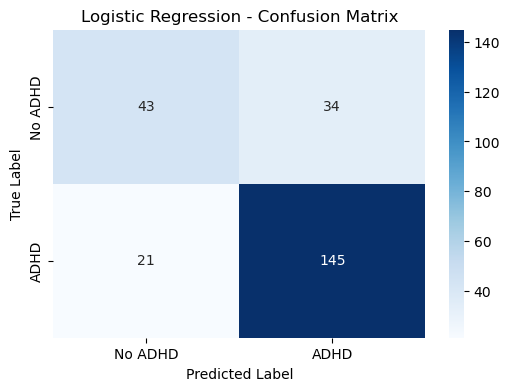


Training Random Forest...
Random Forest Results:
Accuracy: 0.7737
F1-Score (Macro): 0.7069
F1-Score (Weighted): 0.7581

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.47      0.57        77
           1       0.79      0.92      0.85       166

    accuracy                           0.77       243
   macro avg       0.75      0.69      0.71       243
weighted avg       0.77      0.77      0.76       243

Confusion Matrix:
[[ 36  41]
 [ 14 152]]


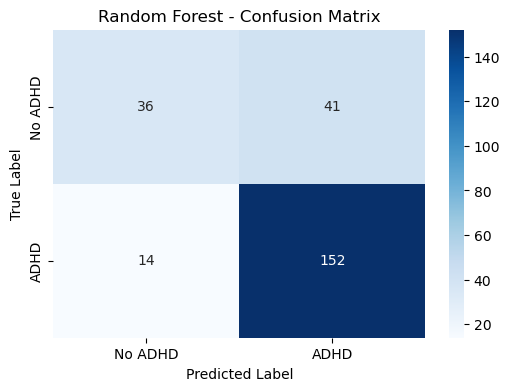


Training SVM...
SVM Results:
Accuracy: 0.7572
F1-Score (Macro): 0.6823
F1-Score (Weighted): 0.7388

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.43      0.53        77
           1       0.77      0.91      0.84       166

    accuracy                           0.76       243
   macro avg       0.73      0.67      0.68       243
weighted avg       0.75      0.76      0.74       243

Confusion Matrix:
[[ 33  44]
 [ 15 151]]


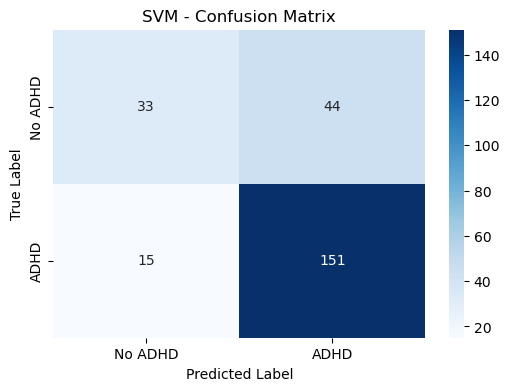


MODEL COMPARISON SUMMARY
                 Model  Accuracy  F1-Macro  F1-Weighted
0  Logistic Regression    0.7737    0.7253       0.7675
1        Random Forest    0.7737    0.7069       0.7581
2                  SVM    0.7572    0.6823       0.7388


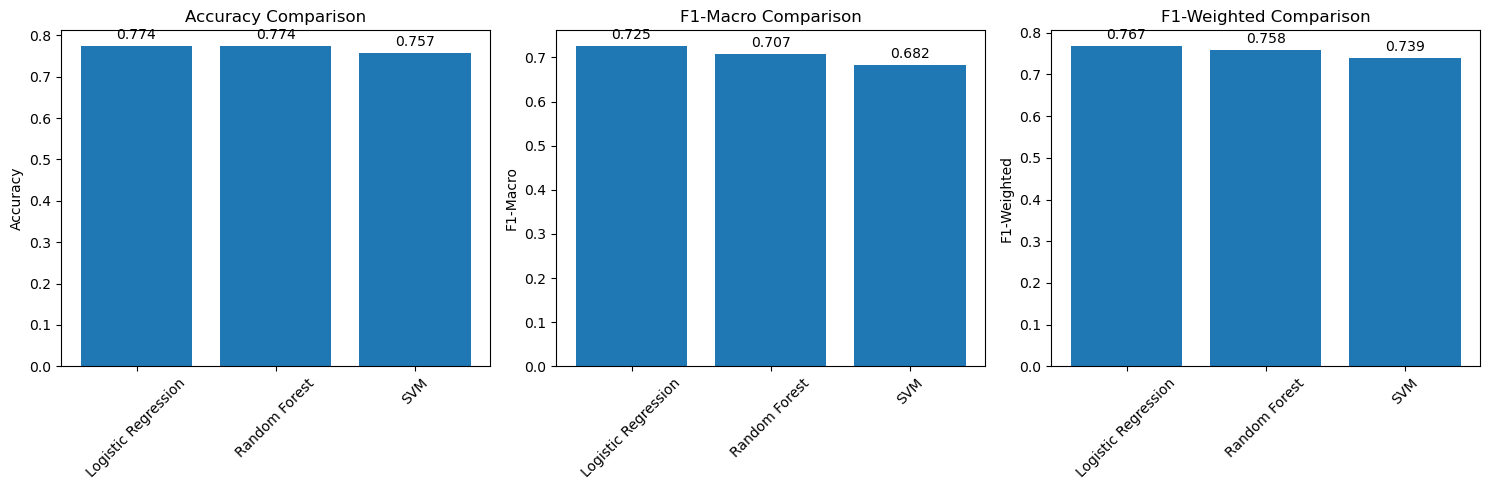


Best performing model (by F1-Macro): Logistic Regression
F1-Macro Score: 0.7253

CLASS DISTRIBUTION ANALYSIS
Training set distribution:
ADHD_Outcome
1    0.685567
0    0.314433
Name: proportion, dtype: float64

Test set distribution:
ADHD_Outcome
1    0.683128
0    0.316872
Name: proportion, dtype: float64

Top 10 Most Important Features (Random Forest):
                        feature  importance
13        SDQ_SDQ_Hyperactivity    0.103643
11        SDQ_SDQ_Externalizing    0.082241
9    SDQ_SDQ_Difficulties_Total    0.072949
12    SDQ_SDQ_Generating_Impact    0.060290
180                  conn_pca_2    0.028353
186                  conn_pca_8    0.026844
185                  conn_pca_7    0.025590
179                  conn_pca_1    0.025565
183                  conn_pca_5    0.025048
181                  conn_pca_3    0.024948


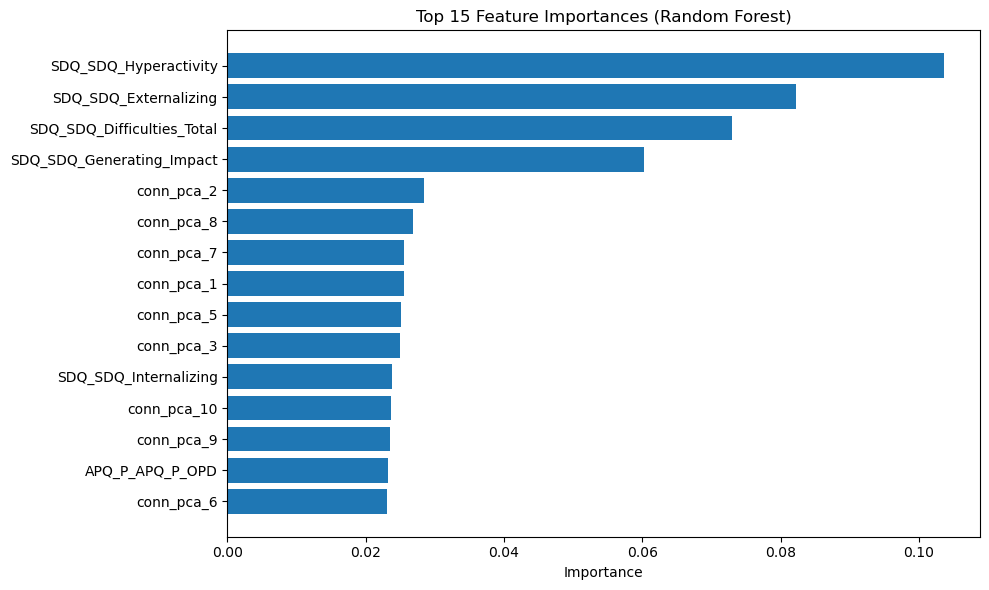

In [ ]:


# Load dataset
df = pd.read_csv(r'C:\Users\04ama\OneDrive\chemistry\ADHD_SEX_Prediction\notebooks\EDA\baseline_dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"Target distribution:")
print(df['ADHD_Outcome'].value_counts())

target_col = 'ADHD_Outcome'
X = df.drop(columns=[target_col, 'participant_id'], errors='ignore')
y = df[target_col]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42, probability=True)
}

results = {}

for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
 
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    f1_weighted = f1_score(y_test, y_pred, average='weighted')
   
    results[name] = {
        'accuracy': accuracy,
        'f1_macro': f1_macro,
        'f1_weighted': f1_weighted,
        'predictions': y_pred,
        'probabilities': y_proba
    }
   
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score (Macro): {f1_macro:.4f}")
    print(f"F1-Score (Weighted): {f1_weighted:.4f}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print(f"Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
    # Plot confusion matrix 
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No ADHD', 'ADHD'], 
                yticklabels=['No ADHD', 'ADHD'])
    plt.title(f'{name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Model comparison
print(f"\n{'='*60}")
print("MODEL COMPARISON SUMMARY")
print(f"{'='*60}")

comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['accuracy'] for model in results.keys()],
    'F1-Macro': [results[model]['f1_macro'] for model in results.keys()],
    'F1-Weighted': [results[model]['f1_weighted'] for model in results.keys()]
})

print(comparison_df.round(4))

# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

metrics = ['Accuracy', 'F1-Macro', 'F1-Weighted']
for i, metric in enumerate(metrics):
    axes[i].bar(comparison_df['Model'], comparison_df[metric])
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for j, v in enumerate(comparison_df[metric]):
        axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

best_model_name = comparison_df.loc[comparison_df['F1-Macro'].idxmax(), 'Model']
print(f"\nBest performing model (by F1-Macro): {best_model_name}")
print(f"F1-Macro Score: {comparison_df.loc[comparison_df['F1-Macro'].idxmax(), 'F1-Macro']:.4f}")

# Class distribution analysis
print(f"\n{'='*40}")
print("CLASS DISTRIBUTION ANALYSIS")
print(f"{'='*40}")
print("Training set distribution:")
print(y_train.value_counts(normalize=True))
print("\nTest set distribution:")
print(y_test.value_counts(normalize=True))

# Feature importance for Random Forest
if 'Random Forest' in results:
    rf_model = models['Random Forest']
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    print(f"\nTop 10 Most Important Features (Random Forest):")
    print(feature_importance.head(10))
    
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance.head(15)['feature'][::-1], 
             feature_importance.head(15)['importance'][::-1])
    plt.title('Top 15 Feature Importances (Random Forest)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show() 